# Water test
--

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import urllib.request

import time
from scipy.stats import linregress

In [13]:
#import datafile from CSV sample file and name as a variable
ar_data_import = "../CA_Water_Analysis/Ar-Water-Lab-Data.csv"
ar_data = pd.read_csv(ar_data_import)

#print the new variable
#ar_data.head()

In [19]:
#split cell to correct for time
for idx, row in ar_data.iterrows(): 
    year=row['sample_date'].split(' ')[0].split('/')[-1]
    if int(year)>22: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'19{year}']
        #print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    else: 
        date=row['sample_date'].split(' ')[0]
        time=row['sample_date'].split(' ')[-1]
        new_date=date.split('/')[:-1]
        new_date=new_date+[f'20{year}']
        #print('/'.join(new_date))
        new_date_str='/'.join(new_date)
    ar_data.loc[idx, 'sample_date']=new_date_str+' '+time

In [29]:
#print new dataframe
#ar_data['sample_date'] = pd.to_datetime(ar_data['sample_date'])
#ar_data = ar_data.sort_values(by='sample_date')
#ar_data.head()

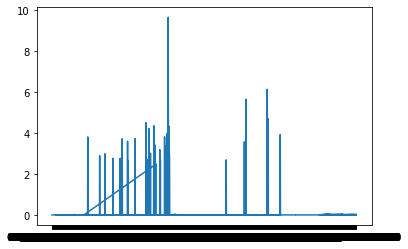

In [30]:
#create a dataframe for counties
county_df = ar_data.loc[(ar_data["county_name"] == "Los Angeles") |
                        (ar_data["county_name"] == "San Diego") |
                        (ar_data["county_name"] == "Kern")|
                        (ar_data["county_name"] == "Orange")]


#plot results for presence a substance county samples by year
Kern = county_df.loc[county_df["county_name"] == "Kern"]
plt.plot(LA["sample_date"], LA["result"])

In [4]:
#sort by the total amount of arsenic found 
#sorted_ar_df = ar_data.sort_values(['result'], ascending=False)
#create a new dataframe from top offenders
#top_offender_df = sorted_ar_df.head(100)

#sorted_top_offender_df = top_offender_df.sort_values(['station_type'], ascending=False)

#sorted_top_offender_df


In [16]:
#count number of entries by county

station_num = sorted_ar_df['county_name'].unique().size
station_thing = sorted_ar_df.groupby(['county_name']).count()
sorted_station_thing = station_thing.sort_values(['county_name'], ascending=False)
sorted_station_thing

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
county_name,,,,,,,,,,,,,,,,,
Yuba,280,280,280,280,280,280,280,280,280,280,189,280,280,280,280,280,280
Yolo,735,735,735,735,735,735,735,735,735,735,536,735,735,727,735,735,735
Ventura,234,234,234,234,234,234,234,234,234,234,1,234,234,234,234,234,234
Tuolumne,48,48,48,48,48,48,48,48,48,48,1,48,48,48,48,48,48
Tulare,193,193,193,193,193,193,193,193,193,193,2,193,193,193,193,193,193
Trinity,165,165,165,165,165,165,165,165,165,165,82,165,165,161,165,165,165
Tehama,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,2355,2794,2794,2634,2794,2794,2794
Sutter,1003,1003,1003,1003,1003,1003,1003,1003,1003,1003,763,1003,1003,1003,1003,1003,1003
Stanislaus,76,76,76,76,76,76,76,76,76,76,10,76,76,76,76,76,76


<function matplotlib.pyplot.show(close=None, block=None)>

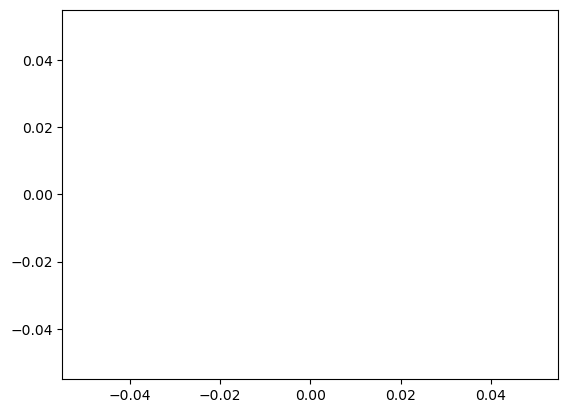

In [40]:
station_id = sorted_ar_df[(sorted_ar_df["station_id"]==12)]
plt.plot(station_1['sample_date'], station_1['result'])
plt.show


In [9]:
# base_url = 'https://data.ca.gov/api/3/action/datastore_create'

# query_url = base_url + "appid=" + api_key + "&q=" + city

url = "https://data.ca.gov/api/3/action/datastore_search?resource_id=819dfd68-4711-49e0-8d85-77f8238a1cd4&"

fileobj = urllib.request.urlopen(url)
response_dict = json.loads(fileobj.read())
response_dict_df = pd.DataFrame(response_dict)
response_dict_df

,help,success,result
_links,https://data.ca.gov/api/3/action/help_show?nam...,True,{'start': '/api/3/action/datastore_search?reso...
fields,https://data.ca.gov/api/3/action/help_show?nam...,True,"[{'type': 'int', 'id': '_id'}, {'type': 'text'..."
include_total,https://data.ca.gov/api/3/action/help_show?nam...,True,True
limit,https://data.ca.gov/api/3/action/help_show?nam...,True,100
records,https://data.ca.gov/api/3/action/help_show?nam...,True,"[{'status': 'Review Status Unknown', 'station_..."
records_format,https://data.ca.gov/api/3/action/help_show?nam...,True,objects
resource_id,https://data.ca.gov/api/3/action/help_show?nam...,True,819dfd68-4711-49e0-8d85-77f8238a1cd4
total,https://data.ca.gov/api/3/action/help_show?nam...,True,4523028
